# BPNet Motifs

Plot for motifs from BPNet.

**Inputs**:
1. PWMs from BPNet.

In [1]:
library(ggseqlogo)
library(ggplot2)
library(patchwork)

## Loading Inputs

In [2]:
read_nptxt_matrix <- function(fname) {
    d=read.table(fname)
    colnames(d) = c("A", "C", "G", "T")
    t(d)
}

In [8]:
OS_pwm = read_nptxt_matrix("/users/surag/kundajelab/scATAC-reprog/resources/BPNet/motifs/Oct4-Sox2/PFM.txt")

## Plot

In [5]:
revcomp <- function(x) {
    x = x[rev(seq(nrow(x))), rev(seq(ncol(x)))]
    rownames(x) = c("A", "C", "G", "T")
    x
}

In [6]:
trim_and_plot <- function(m, rc=F, trim_left=0, trim_right=0, method='bits', ymin=0, ymax=2, title=NULL) {
    if (rc) {
        m = revcomp(m)                
    }

    m = m[, trim_left:(ncol(m)-trim_right)]

    rownames(m) = c("A","C","G","T")
    
    p <- ggseqlogo(m, method=method, ncol=1) + 
                                    ylim(c(ymin,ymax)) +
                                    theme_void() 
    
    if (!is.null(title)) {
        p = p + ggtitle(title)
        p = p + theme(plot.title = element_text(hjust = 0.5, size=18))
    }
    
    p
}

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



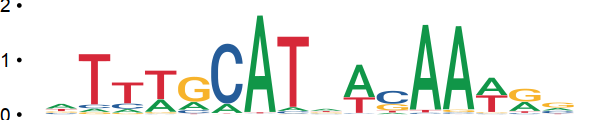

In [23]:
options(repr.plot.width = 5, repr.plot.height = 1)

p = trim_and_plot(OS_pwm, rc=T) + 
     scale_y_continuous(limits=c(0,2),
                                   breaks=c(0,1,2))  +
                theme(axis.title.y = element_blank(),
                      axis.text.y = element_text(margin = margin(0,5,0,0)),
                     axis.ticks.y = element_line(size=1,  linetype = "solid"),
                     axis.text.x = element_blank(),
                     axis.ticks.x = element_blank())

p

In [24]:
ggsave("./subfigs/OS_BPNet.pdf", p, height=1, width=5, useDingbats=F)

---

In [15]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /users/surag/anaconda3/envs/r36_cran/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] patchwork_1.0.0 ggplot2_3.3.3   ggseqlogo_0.1  

loaded via a namespace (and not attached):
 [1] magrittr_1.5      tidyselect_1.1.0  munsell_0.5.0     uuid_0.1-4       
 [5] colorspace_1.4-1  R6_2.4.1          rlang_0.4.11      dplyr_1.0.2      
 [9] tools_3.6.3       grid_3.6.3        gtable_0